# Spam email detector system

## Phase1: Problem Understanding and Data Exploration

## 1. Problem Definition

The aim of this project is to build an **automated spam detection system** that classifies incoming text messages or emails as **spam** or **not spam (ham)**. This system acts as a **text-based advice system**, providing guidance to users on which messages are safe to open and which may be unwanted or potentially harmful.  

Specifically, the system will:  
- Analyze the content of emails or SMS messages.  
- Advise users on message safety by labeling messages as spam or ham.  
- Reduce user exposure to phishing, scams, and unsolicited advertisements.  

The system is a **binary classification system** in the field of **Natural Language Processing (NLP)**.

---

## 2. Scope

- Focuses on **text data** only (no images or attachments).  
- Initially handles **English-language messages**.  
- Provides **real-time or batch classification** of messages.  

---

## 3. Dataset

**Data Source Options:**  
- [Phishing Email Dataset](https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset)  

**Data Columns:**  
- `sender`: Email or phone number of the message sender  
- `receiver`: Recipient email or phone number  
- `date`: Timestamp of the message  
- `subject`: Subject line of the message  
- `body`: Main content of the message (text)  
- `label`: `if its spam 1` or `0` (number)  
- `urls`: `if it contains a URL 1` or `0` (number)  

**Exploration Tasks:**  
- Count the number of spam vs. ham messages and check the classes balance.  
 

---

## 4. NLP Context

Spam detection is primarily an **NLP problem** because it involves understanding the content and context of text messages.  

**Preprocessing tasks include:**  
1. Cleaning text (removing HTML, punctuation, extra spaces).  
2. Tokenization (splitting text into words).  
3. Optional stopword removal.  
4. Stemming or lemmatization to reduce words to root forms.  
5. Feature extraction using techniques like **TF-IDF** or **word embeddings**.  



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("CEAS_08.csv")
df.head()
#if lable 1 its a scamming email if 0 no

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [3]:
len(df)

39154

In [4]:
print("detailed:", df.shape, df['label'].value_counts())

detailed: (39154, 7) label
1    21842
0    17312
Name: count, dtype: int64


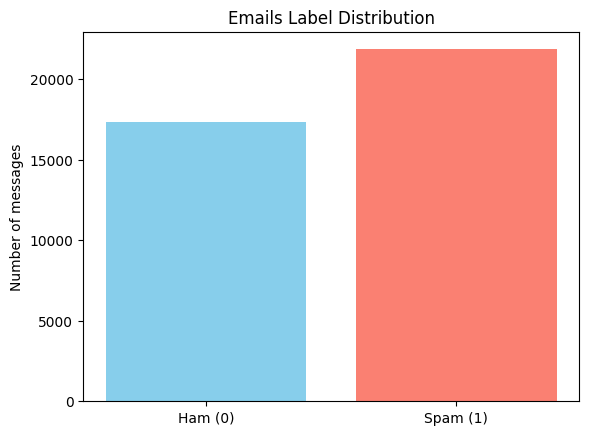

In [5]:
import matplotlib.pyplot as plt

labels = ['Ham (0)', 'Spam (1)']
counts = [17312, 21842]

plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Emails Label Distribution')
plt.ylabel('Number of messages')
plt.show()


### classess are in a good ratio of balance

<Axes: xlabel='urls', ylabel='count'>

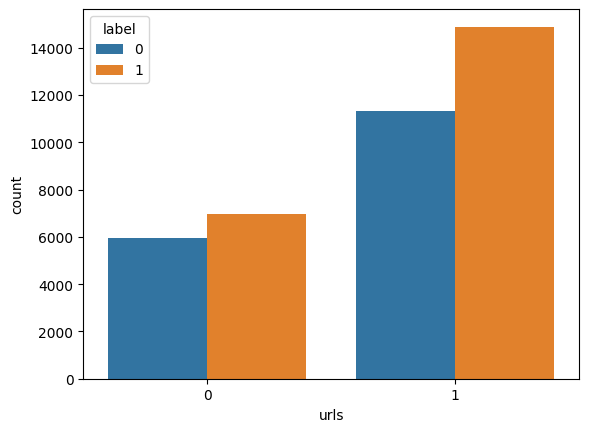

In [6]:
import seaborn as sns
sns.countplot(x='urls', hue='label', data=df)
#exploring if urls affacte the label


# pre-process flow

### sender / receiver: Optional to keep, mostly metadata

### subject / body: Critical for spam detection.

### Missing body → drop row  or replace with empty string?.

### Missing subject → replace with empty string.

### urls / label: Must not be missing. Drop any row missing these.

### 2. Feature Extraction / Engineering
### 1. Combine subject + body into a single text field for modeling i think for text represention as a vector
### 2. extract text length as a numeric feature a new column
### 3. maybe another column that counts a word occurence and all captical words in a text
### 4. Sender/Receiver metadata (optional)

### Could extract domains from email addresses: "gmail.com", "yahoo.com", etc.

### Could count frequency of sender → some frequent spammers.

# 3. Text Preprocessing (NLP)

### This is key for the text column (subject + body): i think we should combine it

### 1.Cleaning

### Remove HTML tags, punctuation, extra whitespace.

### Keep uppercase info optionally (important for spam detection).

### 2.Tokenization

### Split text into words.

### Stopword handling

### Optional: sometimes keeping stopwords is better for spam detection.?

### 3.Stemming / Lemmatization idk maybe not? for better detection ?


### 4.Feature representation

### Convert to numeric vectors: TF-IDF, Bag-of-Words, or word embeddings for model input.